#### Interactive 

We can interact with the MySQL server by logging in interactively to its docker container.

Check the `CONTAINER ID` of the container named `mysql_db` via:
    
```bash 
$ docker ps 
```

And run `bash` (or `/bin/bash`) in interactive mode attaching it to the terminal (`-it`) on the container:

```bash
$ docker exec -it <YOUR CONTAINER ID> bash
```

From inside the container we can use the RDBMS interface as if we were logged into a remote MySQL server hosting our DBs

```bash
$ mysql -u <EITHER ROOT OR USER> -p
``` 

We can then inspect the MySQL server to show us all DBs:
    
```mysql
SHOW DATABASES;
```

_NB_: remember to end a SQL command with a semicolon `;`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
# import the connector
import mysql.connector

# declare a connection to the MySQL server 
# the hostname (or IP) of the server machine should be passed
db = mysql.connector.connect(
  user="root",
  password="root_pwd",
  host="db", # in this case 'db' is the equivalent of the IP address of the server 
             # or 'localhost' if running mysql locally
)

print(db)

In [60]:
# create our db cursor object
dbc = db.cursor()

In [4]:
# show all available databases
dbc.execute(
"SHOW DATABASES"
)
# use fetch to retrieve one, many, or all entries in the cursor
dbc.fetchone()

('IMDb',)

In [5]:
%load_ext sql

%env DATABASE_URL=mysql+mysqlconnector://root:root_pwd@db

env: DATABASE_URL=mysql+mysqlconnector://root:root_pwd@db


## 05 Queries on well-formed DBs

In MySQL we can load entire DBs from external files.

The files will contain the full DB structure (tables and constraints) and will populate all tables with all records 

To load a DB into the MySQL server from the interactive docker shell, we can simply do the following:

1. Create a new DB named `world`
2. Import the content of the file `/mapd-workspace/dbs/world.sql` into the newly created DB via
    
```bash
$ mysql -u root -p world < /mapd-workspace/dbs/world.sql
```

_NB_: The `opt/workspace` directory has been defined as a Docker Volume, and is a shared location with your computer...

Using the `world` DB, perform queries to answer the folliwing questions.

Additional references can be found here https://dev.mysql.com/doc/world-setup/en/


Use a single query to answer the questions

1. Which country has the largest population?
2. Get the total number of cities in Canada.
3. Select the country with the most cities.
4. List all the languages spoken in the Southeast Asia region.
5. Identify the 5 most spoken language by number of countries.
6. What is the total population of the cities in the Caribbean region?
7. What Countries have a City named "Kingston"?
8. Plot the population density by country, limiting to the 25 with least density.
9. Plot the GNP (Gross Nation Product) of all countries that become independent between 1850 and 1910, limiting to the 10 with highest GNP.
10. Create a scatter plot of the life expentency vs the GNP of all countries that have Spanish as their Official language.


Suggestions:
- Start by inspecting the DB tables structure
- When in doubt, check the table content by selecting a few lines (use `LIMIT` to avoid returining all records)
- Before finalizing the query, you can always perform "intermediate" queries to check if complex operations (groupby and join mostly) are stated correctly

In [5]:
%%sql

USE world;

SHOW TABLES;

0 rows affected.
3 rows affected.


Tables_in_world
city
country
countrylanguage


#### 1 - Which country has the largest population?

In [10]:
%%sql 

SELECT Name, Population FROM country
WHERE (Population = (SELECT MAX(Population) FROM country));

 * mysql+mysqlconnector://root:***@db
1 rows affected.


Name,Population
China,1277558000


#### 2 - Get the total number of cities in Canada.

In [16]:
%%sql

SELECT CountryCode, COUNT(CountryCode) AS NumberOfCities FROM city
WHERE CountryCode LIKE "CAN"
GROUP BY CountryCode;

 * mysql+mysqlconnector://root:***@db
1 rows affected.


CountryCode,NumberOfCities
CAN,49


#### 3 - Select the country with the most cities.

In [21]:
%%sql

SELECT CountryCode, COUNT(CountryCode) AS NumberOfCities FROM city
GROUP BY CountryCode
ORDER BY NumberOfCities DESC
LIMIT 1;

 * mysql+mysqlconnector://root:***@db
1 rows affected.


CountryCode,NumberOfCities
CHN,363


In [23]:
%%sql

SELECT co.Name, COUNT(ci.CountryCode) AS NumberOfCities FROM city ci
INNER JOIN country co ON ci.CountryCode = co.Code
GROUP BY CountryCode
ORDER BY NumberOfCities DESC
LIMIT 1;

 * mysql+mysqlconnector://root:***@db
1 rows affected.


Name,NumberOfCities
China,363


#### 4 - List all the languages spoken in the 'Southeast Asia' region.

In [29]:
%%sql

SELECT co.Code, co.Name, co.Region, cl.Language FROM country co
INNER JOIN countrylanguage cl ON co.Code = cl.CountryCode
WHERE Region LIKE "Southeast Asia";

 * mysql+mysqlconnector://root:***@db
65 rows affected.


Code,Name,Region,Language
BRN,Brunei,Southeast Asia,Chinese
BRN,Brunei,Southeast Asia,English
BRN,Brunei,Southeast Asia,Malay
BRN,Brunei,Southeast Asia,Malay-English
IDN,Indonesia,Southeast Asia,Bali
IDN,Indonesia,Southeast Asia,Banja
IDN,Indonesia,Southeast Asia,Batakki
IDN,Indonesia,Southeast Asia,Bugi
IDN,Indonesia,Southeast Asia,Javanese
IDN,Indonesia,Southeast Asia,Madura


#### 5 - Identify the 5 most spoken languages by number of countries.

In [30]:
%%sql

SELECT Language, COUNT(CountryCode) AS NumberOfCountries FROM countrylanguage
GROUP BY Language
ORDER BY NumberOfCountries DESC
LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


Language,NumberOfCountries
English,60
Arabic,33
Spanish,28
French,25
German,19


#### 6 - What is the total population of the cities in the Caribbean region?

In [35]:
%%sql

SELECT Region, SUM(Population) AS TotalPopulation FROM country
WHERE Region LIKE "Caribbean"
GROUP BY Region;

 * mysql+mysqlconnector://root:***@db
1 rows affected.


Region,TotalPopulation
Caribbean,38140000


#### 7 - What Countries have a City named "Kingston"?

In [41]:
%%sql

SELECT ci.Name, ci.CountryCode, co.Region FROM city ci
INNER JOIN country co ON ci.CountryCode = co.Code
WHERE ci.Name LIKE "Kingston";

 * mysql+mysqlconnector://root:***@db
2 rows affected.


Name,CountryCode,Region
Kingston,JAM,Caribbean
Kingston,NFK,Australia and New Zealand


#### 8 - Plot the population density by country, limiting to the 25 with least density.

In [46]:
%%sql

SELECT Code, Name, Region, (Population/SurfaceArea) AS density FROM country
ORDER BY density
LIMIT 25;

 * mysql+mysqlconnector://root:***@db
25 rows affected.


Code,Name,Region,density
UMI,United States Minor Outlying Islands,Micronesia/Caribbean,0.0000
IOT,British Indian Ocean Territory,Eastern Africa,0.0000
HMD,Heard Island and McDonald Islands,Antarctica,0.0000
SGS,South Georgia and the South Sandwich Islands,Antarctica,0.0000
BVT,Bouvet Island,Antarctica,0.0000
ATF,French Southern territories,Antarctica,0.0000
ATA,Antarctica,Antarctica,0.0000
GRL,Greenland,North America,0.0259
SJM,Svalbard and Jan Mayen,Nordic Countries,0.0513
FLK,Falkland Islands,South America,0.1643


 * mysql+mysqlconnector://root:***@db
25 rows affected.


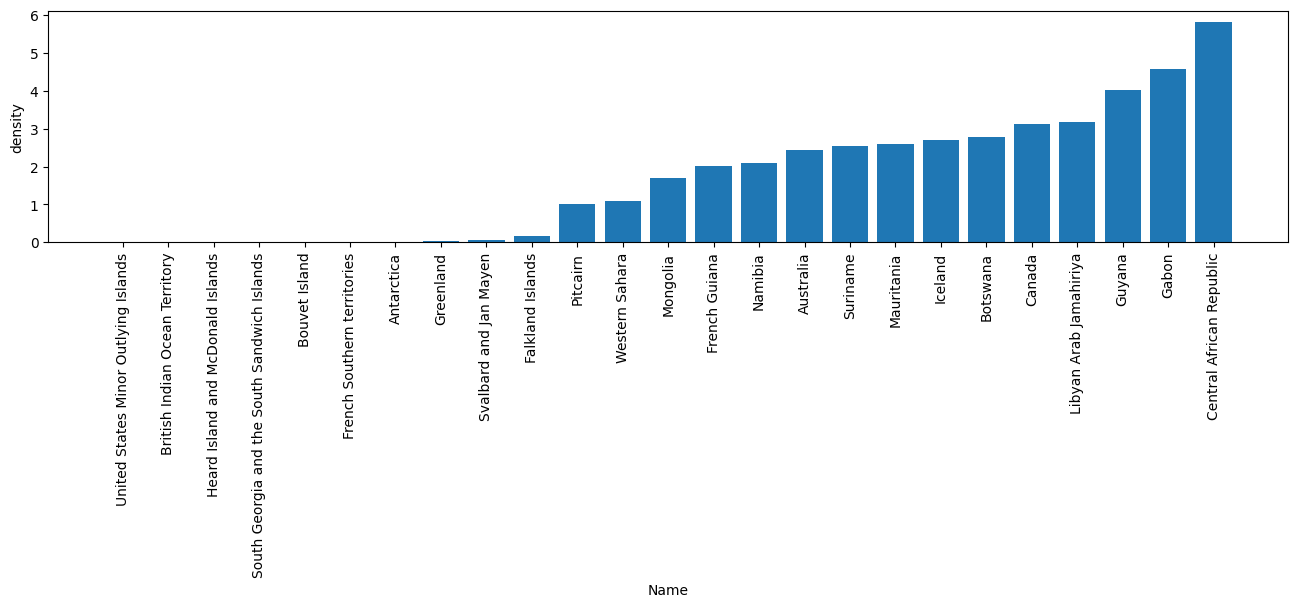

In [56]:
to_plot = %sql SELECT Name, (Population/SurfaceArea) AS density FROM country ORDER BY density LIMIT 25;
plt.figure(figsize=(16,3))
to_plot.bar()
plt.xticks(rotation='vertical');

#### 9 - Plot the GNP (Gross Nation Product) of all countries that become independent between 1850 and 1910, limiting to the 10 with highest GNP.

 * mysql+mysqlconnector://root:***@db
10 rows affected.


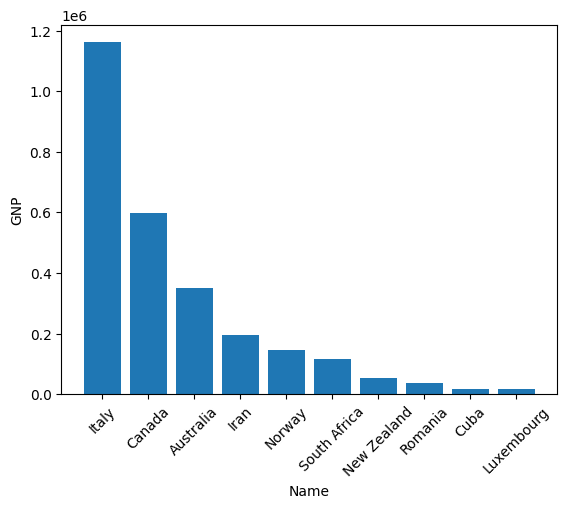

In [59]:
res = %sql SELECT Name, GNP FROM country WHERE IndepYear BETWEEN 1850 AND 1910 ORDER BY GNP DESC LIMIT 10;

res.bar();

#### 10 - Create a scatter plot of the life expentency vs the GNP of all countries that have Spanish as their Official language.

In [63]:
%%sql

SELECT co.LifeExpectancy, co.GNP FROM country co
INNER JOIN countrylanguage cl ON co.Code = cl.CountryCode
WHERE cl.Language = "Spanish" AND cl.isOfficial = "T"
LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


LifeExpectancy,GNP
75.1,340238.00
63.7,8571.00
75.7,72949.00
70.3,102896.00
75.8,10226.00


In [75]:
dbc.execute("USE world;")
sql_ = "SELECT co.LifeExpectancy, co.GNP \
FROM country co \
INNER JOIN countrylanguage cl ON co.Code = cl.CountryCode \
WHERE cl.Language = 'Spanish' \
AND cl.isOfficial = 'T';"

dbc.execute(sql_)
res = dbc.fetchall()
print(res)

[(Decimal('75.1'), Decimal('340238.00')), (Decimal('63.7'), Decimal('8571.00')), (Decimal('75.7'), Decimal('72949.00')), (Decimal('70.3'), Decimal('102896.00')), (Decimal('75.8'), Decimal('10226.00')), (Decimal('76.2'), Decimal('17843.00')), (Decimal('73.2'), Decimal('15846.00')), (Decimal('71.1'), Decimal('19770.00')), (Decimal('78.8'), Decimal('553233.00')), (Decimal('66.2'), Decimal('19008.00')), (Decimal('69.9'), Decimal('5333.00')), (Decimal('71.5'), Decimal('414972.00')), (Decimal('68.7'), Decimal('1988.00')), (Decimal('75.5'), Decimal('9131.00')), (Decimal('70.0'), Decimal('64140.00')), (Decimal('75.6'), Decimal('34100.00')), (Decimal('73.7'), Decimal('8444.00')), (Decimal('69.7'), Decimal('11863.00')), (Decimal('75.2'), Decimal('20831.00')), (Decimal('73.1'), Decimal('95023.00'))]


 * mysql+mysqlconnector://root:***@db
20 rows affected.


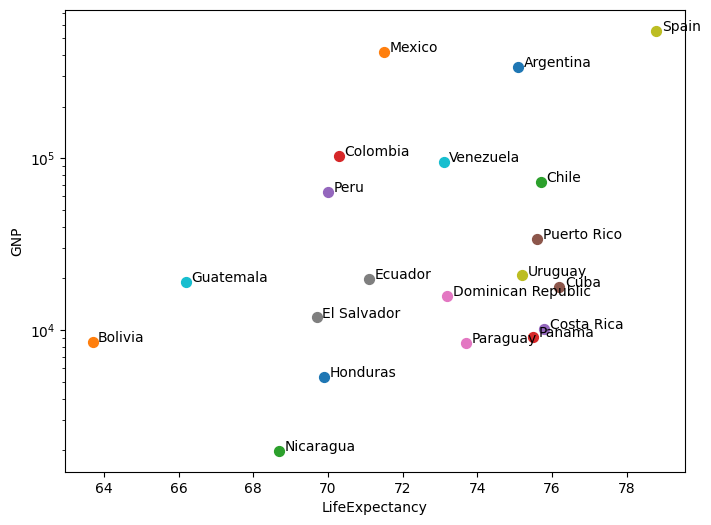

In [84]:
res_ = %sql SELECT co.LifeExpectancy, co.GNP, co.Name FROM country co INNER JOIN countrylanguage cl ON co.Code = cl.CountryCode WHERE cl.Language = 'Spanish' AND cl.isOfficial = 'T';

plt.figure(figsize=(8,6))
for _ in res_:
    plt.scatter(_[0],_[1],s=50);
    plt.annotate(_[2], (float(_[0])*1.002,float(_[1])*1.002));
plt.ylabel('GNP')
plt.xlabel('LifeExpectancy')
plt.yscale('log')
plt.show()

## 06 More on queries 

Let' import a well-structured DB, with several tables and relationships, to be used as a sandbox for further exercises on queries.

The `.sql` file can be found at: `/mapd-workspace/dbs/IMDb_pruned.sql`.

The DB is freely available and is taken from the IMDb (Internet Movie Database) website (https://www.imdb.com/interfaces/).

The entire database is composed of a dozen of tables, hosing all people involved in Movies, Shorts, TV Show Epidoses and more since the 1890s. 

To simplify the execution of queries, we will work with a slimmed-down version of the entire DB, with still plenty of records for us to extract interesting information.

1. Create a new DB named `IMDb`
2. Import the content of the file `/mapd-workspace/dbs/IMDb_pruned.sql` into the newly created DB
(this might take a minute or two...)

### Check which tables are available

In [6]:
%%sql

USE IMDb;

SHOW TABLES;

0 rows affected.
7 rows affected.


Tables_in_IMDb
Directors
Episode_belongs_to
Had_role
Names_
Title_genres
Title_ratings
Titles


### Describe the content of table Names_

In [7]:
%%sql

DESCRIBE Names_;

 * mysql+mysqlconnector://root:***@db
4 rows affected.


Field,Type,Null,Key,Default,Extra
name_id,b'varchar(255)',NO,,None,
name_,b'varchar(255)',NO,,None,
birth_year,b'smallint',YES,,None,
death_year,b'smallint',YES,,None,


### People by birth year

A) Start by limiting the query to 1000 entries

1. Draw an histogram of the year of birth
2. Draw a second histogram with the year of birth of the 1000 youngest people in the list

In [8]:
%%sql

SELECT * FROM Names_
LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


name_id,name_,birth_year,death_year
nm0000002,Lauren Bacall,1924,2014
nm0000003,Brigitte Bardot,1934,None
nm0000005,Ingmar Bergman,1918,2007
nm0000008,Marlon Brando,1924,2004
nm0000013,Doris Day,1922,2019


 * mysql+mysqlconnector://root:***@db
1000 rows affected.


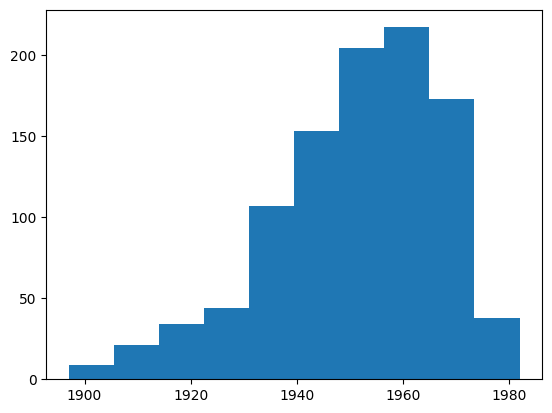

In [9]:
to_hist = %sql SELECT birth_year FROM Names_ LIMIT 1000;
to_hist = [x[0] for x in to_hist]
plt.hist(to_hist);

 * mysql+mysqlconnector://root:***@db
1000 rows affected.


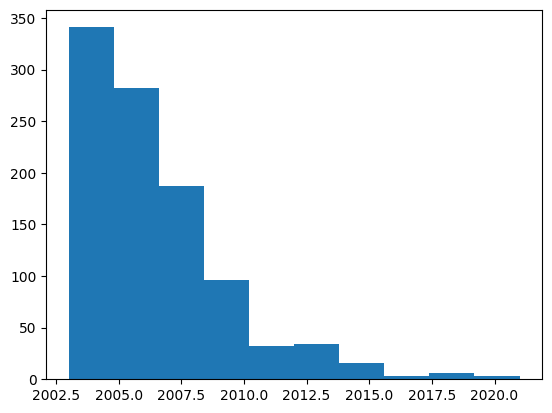

In [10]:
to_hist = %sql SELECT birth_year FROM Names_ ORDER BY birth_year DESC LIMIT 1000;
to_hist = [x[0] for x in to_hist]
plt.hist(to_hist);

B) Extend the query to all records in the table

1. Check for outliers (inspect min and max)
2. If any outlier is found, limit the query to a reasonable range (at least people born after 1850)
3. Draw a new histogram with the year of birth
4. Compute the mean and std of year of birth

In [11]:
%%sql

SELECT MIN(birth_year), MAX(birth_year) FROM Names_; # min is too min... there is some error

 * mysql+mysqlconnector://root:***@db
1 rows affected.


MIN(birth_year),MAX(birth_year)
13,2021


In [12]:
%%sql 

USE IMDb;

SHOW TABLES;

 * mysql+mysqlconnector://root:***@db
0 rows affected.
7 rows affected.


Tables_in_IMDb
Directors
Episode_belongs_to
Had_role
Names_
Title_genres
Title_ratings
Titles


In [13]:
%%sql

SELECT MIN(birth_year), MAX(birth_year) FROM Names_
WHERE birth_year < 1850; # min is too min... and even max is too min

 * mysql+mysqlconnector://root:***@db
1 rows affected.


MIN(birth_year),MAX(birth_year)
13,1088


In [14]:
%%sql 

USE IMDb;

SHOW TABLES;

 * mysql+mysqlconnector://root:***@db
0 rows affected.
7 rows affected.


Tables_in_IMDb
Directors
Episode_belongs_to
Had_role
Names_
Title_genres
Title_ratings
Titles


 * mysql+mysqlconnector://root:***@db
156309 rows affected.
 * mysql+mysqlconnector://root:***@db
1 rows affected.


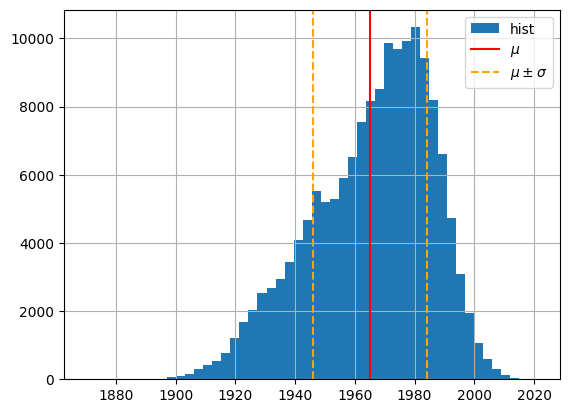

In [28]:
to_hist_new = %sql SELECT birth_year FROM Names_ WHERE birth_year > 1850;
to_hist_new = [x[0] for x in to_hist_new]
graph = %sql SELECT AVG(birth_year), STD(birth_year) FROM Names_ WHERE birth_year > 1850;

plt.hist(to_hist_new, bins=50, label="hist")
plt.axvline(x=int(graph[0][0]), label="$\mu$", c="red")
plt.axvline(x=int(graph[0][0])+int(graph[0][1]), label="$\mu\pm\sigma$", ls="--", c="orange")
plt.axvline(x=int(graph[0][0])-int(graph[0][1]), ls="--", c="orange")
plt.legend()
plt.grid()
plt.show()

### Movie stats

1. Plot how many titles can be found in the DB per year, over the past 25 years
2. List the names of all actors who have had the role of Spider-Man and the corresponding Title
3. List and count the 10 people who appeared the most in movies by "Wes Anderson"

#### 1 - Plot how many titles can be found in the DB per year, over the past 25 years

In [29]:
%%sql 

SELECT * FROM Titles LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


title_id,title_type,primary_title,start_year,runtime_minutes
tt0011216,movie,b'Spanish Fiesta',2019,67
tt0015724,movie,b'Dama de noche',1993,102
tt0035423,movie,b'Kate & Leopold',2001,118
tt0059325,movie,"b""Born in '45""",1990,100
tt0059900,movie,"b'Wenn du gro\xc3\x9f bist, lieber Adam'",1990,78


 * mysql+mysqlconnector://root:***@db
25 rows affected.


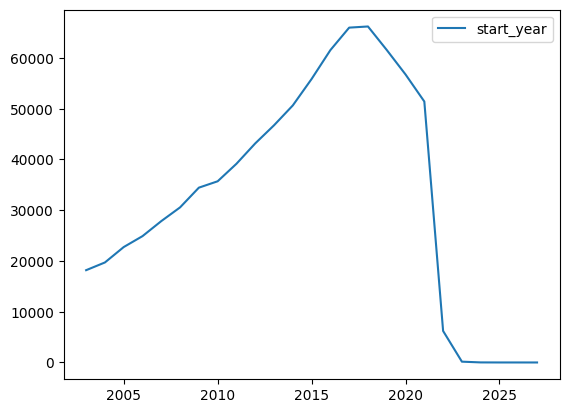

In [30]:
to_plot = %sql SELECT start_year, COUNT(start_year) AS Counts FROM Titles GROUP BY start_year ORDER BY start_year DESC LIMIT 25;
years = [x[0] for x in to_plot]
counts = [x[1] for x in to_plot]
plt.plot(years, counts, label="start_year")
plt.legend()
plt.show()

#### 2 - List the names of all actors who have had the role of Spider-Man and the corresponding Title 

In [7]:
%%sql 

SELECT n.name_, t.primary_title FROM Had_role h
INNER JOIN Titles t ON h.title_id = t.title_id
INNER JOIN Names_ n ON h.name_id = n.name_id
WHERE (h.role_ LIKE "Spider-Man") AND (t.title_type LIKE "movie");

 * mysql+mysqlconnector://root:***@db
8 rows affected.


name_,primary_title
Tobey Maguire,b'Spider-Man'
Tobey Maguire,b'Spider-Man 3'
Tobey Maguire,b'Spider-Man 2'
Andrew Garfield,b'The Amazing Spider-Man 2'
Andrew Garfield,b'The Amazing Spider-Man'
Tom Holland,b'Spider-Man: No Way Home'
Tom Holland,b'Spider-Man: Homecoming'
Tom Holland,b'Spider-Man: Far from Home'


#### 3 - List and count the 10 people who appeared the most in movies by "Wes Anderson"

In [49]:
%%sql 

CREATE VIEW WesAnderson AS
SELECT n.name_, t.primary_title, t.title_id FROM Directors d 
INNER JOIN Titles t ON d.title_id = t.title_id
INNER JOIN Names_ n ON d.name_id = n.name_id
WHERE (t.title_type = "movie") AND (n.name_ LIKE "Wes Anderson");

 * mysql+mysqlconnector://root:***@db
0 rows affected.


[]

In [50]:
%%sql

SELECT n.name_, w.primary_title, h.role_ FROM WesAnderson AS w
INNER JOIN Had_role h ON w.title_id = h.title_id
INNER JOIN Names_ n ON h.name_id = n.name_id;

 * mysql+mysqlconnector://root:***@db
39 rows affected.


name_,primary_title,role_
Benicio Del Toro,b'The French Dispatch',b'Moses Rosenthaler'
Owen Wilson,b'The Darjeeling Limited',b'Francis'
Ben Stiller,b'The Royal Tenenbaums',b'Chas Tenenbaum'
Shea Fowler,b'Bottle Rocket',b'Grace'
Edward Norton,b'Isle of Dogs',b'Rex'
F. Murray Abraham,b'The Grand Budapest Hotel',b'Mr. Moustafa'
Bill Murray,b'The Life Aquatic with Steve Zissou',b'Steve Zissou'
Jason Schwartzman,b'The Darjeeling Limited',b'Jack'
Bruce Willis,b'Moonrise Kingdom',b'Captain Sharp'
Adrien Brody,b'The Grand Budapest Hotel',b'Dmitri'


In [51]:
%%sql

SELECT n.name_, COUNT(n.name_) AS NumOfApparitions FROM WesAnderson AS w
INNER JOIN Had_role h ON w.title_id = h.title_id
INNER JOIN Names_ n ON h.name_id = n.name_id
GROUP BY n.name_
ORDER BY NumOfApparitions DESC;

 * mysql+mysqlconnector://root:***@db
29 rows affected.


name_,NumOfApparitions
Bill Murray,4
Owen Wilson,3
Adrien Brody,3
Jason Schwartzman,3
Anjelica Huston,2
Léa Seydoux,1
Seymour Cassel,1
Gwyneth Paltrow,1
Amara Karan,1
Benicio Del Toro,1


### Is the IMDB only about movies? 

1. Check the number of different media types contained in the DB
2. Plot an histogram about the number of media types per group
3. Find the name and rating of the oldest videogame stored in the DB 

In [7]:
%%sql

SHOW TABLES;

 * mysql+mysqlconnector://root:***@db
7 rows affected.


Tables_in_IMDb
Directors
Episode_belongs_to
Had_role
Names_
Title_genres
Title_ratings
Titles


#### 1 - Check the number of different media types contained in the DB

In [13]:
%%sql

SELECT title_type, COUNT(title_type) AS NumOfTypes FROM Titles GROUP BY title_type;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


title_type,NumOfTypes
movie,239353
tvEpisode,708598
tvSeries,59424
tvMiniSeries,11963
videoGame,257


#### 2 - Plot an histogram about the number of media types per group

 * mysql+mysqlconnector://root:***@db
5 rows affected.


<BarContainer object of 5 artists>

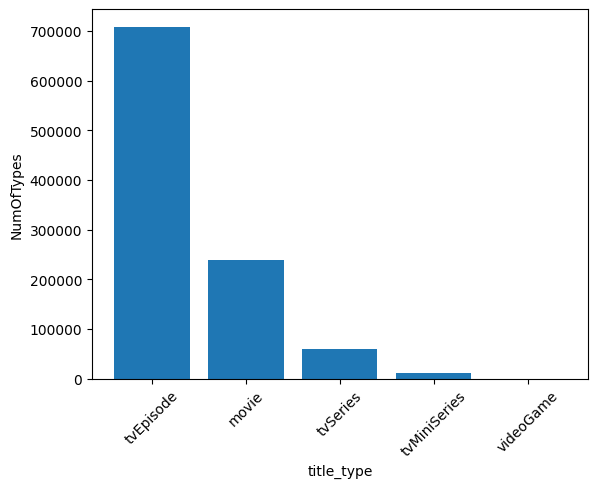

In [16]:
res_ = %sql SELECT title_type, COUNT(title_type) AS NumOfTypes FROM Titles GROUP BY title_type ORDER BY NumOfTypes DESC;
res_.bar()

#### 3 - Find the name and rating of the oldest videogame stored in the DB 

In [29]:
%%sql

SELECT t.primary_title, t.start_year, r.average_rating, r.num_votes, t.runtime_minutes FROM Title_ratings r
INNER JOIN Titles t ON r.title_id = t.title_id
WHERE (t.title_type LIKE "video%") AND (t.start_year = (SELECT MIN(t1.start_year) FROM Titles t1 WHERE t1.title_type LIKE "video%")) 
LIMIT 1;

 * mysql+mysqlconnector://root:***@db
1 rows affected.


primary_title,start_year,average_rating,num_votes,runtime_minutes
b'Lord of the Rings',1990,6.9,162,235


### Identify interesting outliers 

1. List the names of movies whose title begin with "The" have a runtime between 3 and 4 hours.
2. What actor had the most roles as 'Self'?
3. Identify what TV series had more than 1,000 episodes, and check the first- and last-episod year

#### 1 - List the names of movies whose title begins with "The" have a runtime between 3 and 4 hours.

In [32]:
%%sql

SELECT * FROM Titles
WHERE (primary_title LIKE "The%") 
AND (runtime_minutes BETWEEN 3*60 AND 4*60) 
AND (title_type = "movie")
LIMIT 10;

 * mysql+mysqlconnector://root:***@db
10 rows affected.


title_id,title_type,primary_title,start_year,runtime_minutes
tt0101428,movie,b'The Beautiful Troublemaker',1991,238
tt0104350,movie,b'The Best Intentions',1992,180
tt0107472,movie,"b'The Wonderful, Horrible Life of Leni Riefenstahl'",1993,183
tt0109584,movie,b'The Decline of the Century: Testament L.Z.',1994,201
tt0110894,movie,b'The Beginning and the End',1993,188
tt0120125,movie,b'The Barber of Siberia',1998,180
tt0120689,movie,b'The Green Mile',1999,189
tt0133027,movie,b'The Year After Dayton',1997,204
tt0138104,movie,b'The Sleep Room',1998,193
tt0167260,movie,b'The Lord of the Rings: The Return of the King',2003,201


#### 2 - What actor had the most roles as 'Self'?

In [40]:
%%sql

SELECT n.name_, COUNT(n.name_) AS NumOfSelf FROM Had_role h
INNER JOIN Names_ n ON h.name_id = n.name_id
WHERE h.role_ LIKE "Self"
GROUP BY n.name_
ORDER BY NumOfSelf DESC
LIMIT 1;

 * mysql+mysqlconnector://root:***@db
1 rows affected.


name_,NumOfSelf
Scott Morrison,3197


#### 3 - Identify what TV series had more than 1,000 episodes, and check the first- and last-episod year

In [46]:
%%sql

SELECT t.primary_title, COUNT(t.primary_title) AS NumOfEpisodes, MIN(t.start_year) AS starting_year FROM Episode_belongs_to ep
INNER JOIN Titles t ON ep.parent_tv_show_title_id = t.title_id
GROUP BY t.primary_title
ORDER BY NumOfEpisodes DESC
LIMIT 10;

 * mysql+mysqlconnector://root:***@db
10 rows affected.


primary_title,NumOfEpisodes,starting_year
b'Charlie Rose',9884,1991
"b'Gute Zeiten, schlechte Zeiten'",7455,1992
b'Judge Judy',7282,1996
b'Unter uns',6803,1994
b'Late Show with David Letterman',6691,1993
"b'Goede tijden, slechte tijden'",6550,1990
b'Young Hearts',6247,1995
b'DAS!',5433,1991
"b""L'invit\xc3\xa9""",5273,2000
b'Volle Kanne',5111,1999


### It's all about the ratings 

1. Group all movies by decade and plot the rating distribution. Limit the query to the movies with at least 1000 ratings.
2. Plot the average rating of each episode of Games of Thrones. Group by season and compute the average and std for each season
3. Plot the total numer of movies per year, divided by genre (Action, Comedy, Drama, Thriller, Fantasy), and the yearly rating average per genre

#### 1 - Group all movies by decade and plot the rating distribution. Limit the query to the movies with at least 1000 ratings.

In [56]:
%%sql

SELECT t.start_year, AVG(r.average_rating) AS MeanYearRating FROM Titles t
INNER JOIN Title_ratings r ON t.title_id = r.title_id
WHERE r.num_votes > 1000 AND t.start_year IS NOT NULL
GROUP BY t.start_year
ORDER BY start_year
LIMIT 10;

 * mysql+mysqlconnector://root:***@db
10 rows affected.


start_year,MeanYearRating
1990,6.786105684104964
1991,6.840665442665932
1992,6.962099662242835
1993,6.868778979759865
1994,6.846964873064059
1995,6.940822339793134
1996,6.891791064347794
1997,6.9218670201423524
1998,6.9902439082541115
1999,7.091728545448813


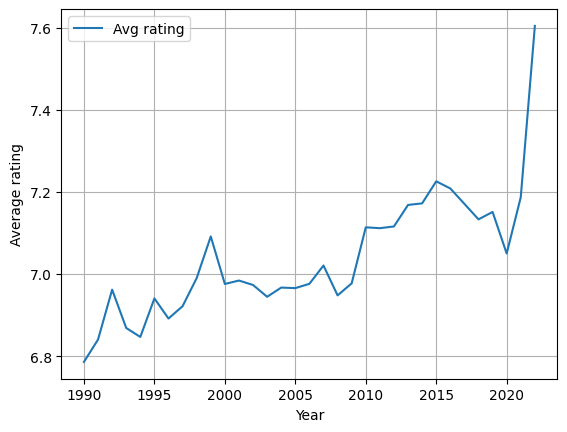

In [73]:
sql_ = "SELECT t.start_year, AVG(r.average_rating) AS MeanYearRating FROM Titles t \
INNER JOIN Title_ratings r ON t.title_id = r.title_id \
WHERE r.num_votes > 1000 AND t.start_year IS NOT NULL \
GROUP BY t.start_year \
ORDER BY start_year;"

dbc.execute("USE IMDb;")
dbc.execute(sql_)
res_ = dbc.fetchall()
years = [x[0] for x in res_]
counts = [x[1] for x in res_]
plt.plot(years, counts, label="Avg rating")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.legend()
plt.grid()
plt.show()

#### 2 - Plot the average rating of each episode of Games of Thrones. Group by season and compute the average and std for each season

In [96]:
%%sql

SELECT * FROM Title_ratings r
WHERE (r.title_id IN (
    SELECT episode_title_id FROM Episode_belongs_to 
    WHERE (parent_tv_show_title_id = (
    SELECT t.title_id FROM Titles t
    WHERE t.primary_title LIKE "Game of Thrones" 
    AND t.title_type LIKE "tvSe%"))
))
LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


title_id,average_rating,num_votes
tt1480055,9.1,45688
tt1668746,8.8,34688
tt1829962,8.7,32849
tt1829963,8.8,31231
tt1829964,9.1,32486


 * mysql+mysqlconnector://root:***@db
73 rows affected.


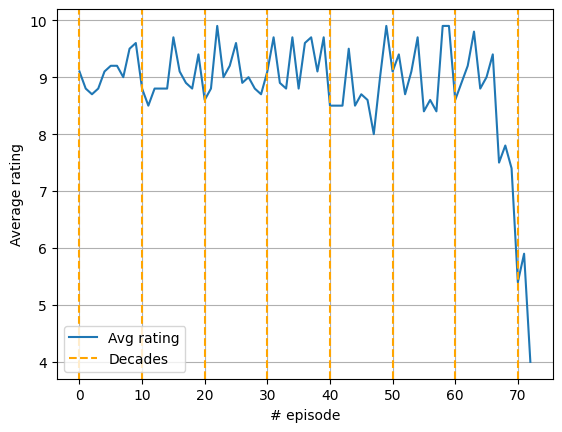

In [93]:
to_plot = %sql SELECT average_rating FROM Title_ratings r WHERE (r.title_id IN (SELECT episode_title_id FROM Episode_belongs_to WHERE (parent_tv_show_title_id = (SELECT t.title_id FROM Titles t WHERE t.primary_title LIKE "Game of Thrones" AND t.title_type LIKE "tvSe%"))));
to_plot = [x[0] for x in to_plot]
episodes = range(0, len(to_plot), 10)
plt.plot(to_plot, label="Avg rating")
for i in episodes:
    lab = "Decades" if i == episodes[0] else None
    plt.axvline(x=i, ls="--", c="orange", label=lab)
plt.xlabel("# episode")
plt.ylabel("Average rating")
plt.legend()
plt.grid()
plt.show()

#### 3 - Plot the total numer of movies per year, divided by genre (Action, Comedy, Drama, Thriller, Fantasy), and the yearly rating average per genre

In [117]:
%%sql

SELECT t.primary_title, t.start_year, tg.genre, r.average_rating FROM Title_genres tg
INNER JOIN Titles t ON tg.title_id = t.title_id
INNER JOIN Title_ratings r ON t.title_id = r.title_id
WHERE t.title_type = "movie"
LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


primary_title,start_year,genre,average_rating
b'Spanish Fiesta',2019,Drama,6.9
b'Dama de noche',1993,Drama,6.2
b'Dama de noche',1993,Mystery,6.2
b'Dama de noche',1993,Romance,6.2
b'Kate & Leopold',2001,Comedy,6.4


In [120]:
%%sql

SELECT t.start_year, tg.genre, COUNT(t.primary_title) AS NumOfFilmPerYear, AVG(r.average_rating) FROM Title_genres tg
INNER JOIN Titles t ON tg.title_id = t.title_id
INNER JOIN Title_ratings r ON t.title_id = r.title_id
WHERE t.title_type = "movie" AND t.start_year IS NOT NULL
GROUP BY t.start_year, tg.genre
ORDER BY t.start_year
LIMIT 5;

 * mysql+mysqlconnector://root:***@db
5 rows affected.


start_year,genre,NumOfFilmPerYear,AVG(r.average_rating)
1990,Action,385,5.513246741232934
1990,Adventure,114,5.796491223469115
1990,Animation,25,6.851999988555908
1990,Biography,48,6.672916695475578
1990,Comedy,550,5.837272716435519


In [122]:
sql_ = "SELECT t.start_year, tg.genre, COUNT(t.primary_title) AS NumOfFilmPerYear, AVG(r.average_rating) FROM Title_genres tg \
INNER JOIN Titles t ON tg.title_id = t.title_id \
INNER JOIN Title_ratings r ON t.title_id = r.title_id \
WHERE t.title_type = 'movie' AND t.start_year IS NOT NULL \
GROUP BY t.start_year, tg.genre \
ORDER BY t.start_year;"

dbc.execute("USE IMDb;")
dbc.execute(sql_)
res = dbc.fetchall()

In [126]:
res[:5]

[(1990, 'Action', 385, 5.513246741232934),
 (1990, 'Adventure', 114, 5.796491223469115),
 (1990, 'Animation', 25, 6.851999988555908),
 (1990, 'Biography', 48, 6.672916695475578),
 (1990, 'Comedy', 550, 5.837272716435519)]

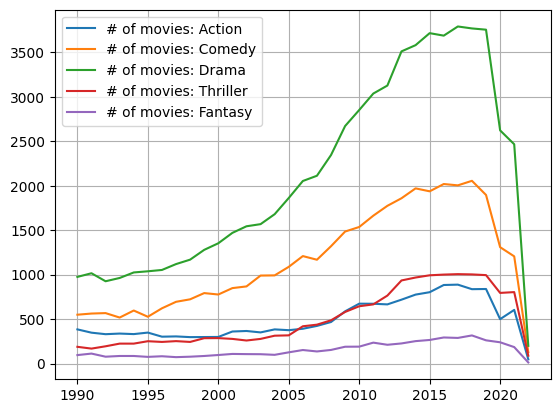

In [132]:
genres = ["Action", "Comedy", "Drama", "Thriller", "Fantasy"]
for genre in genres:
    # here we plot the total number of movies per year for each genre
    year = [x[0] for x in res if x[1] == genre]
    avg = [x[2] for x in res if x[1] == genre]
    plt.plot(year, avg, label=f"# of movies: {genre}")
        
plt.grid()
plt.legend()
plt.show()

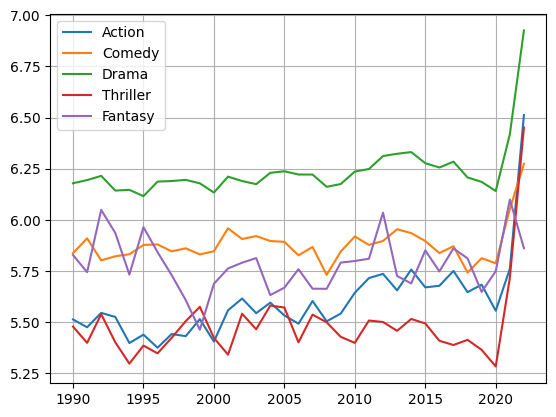

In [128]:
genres = ["Action", "Comedy", "Drama", "Thriller", "Fantasy"]
for genre in genres:
    # here we plot the yearly rating average for each genre
    year = [x[0] for x in res if x[1] == genre]
    avg = [x[3] for x in res if x[1] == genre]
    plt.plot(year, avg, label=genre)
        
plt.grid()
plt.legend()
plt.show()